# Data analytics on trade data
### In this analysis we are going to describe the behaviour of muliple trading plans.


In [2]:
# IMPORT PANDAS
import pandas as pd

# IMPORT NUMPY
import numpy as np

# IMPORT NATPLOTLIB
import matplotlib.pyplot as plt

# IMPORT SEABORN
import seaborn as sns

### LOAD THE DATA SET

In [4]:
df_trade_data = pd.read_excel('trade_data.xlsx')

### Data Overview

In [6]:
# Show first five observations of the data 
df_trade_data.head()

,HSCode,type,Commodity,value,country,year,trade_value,quantity,unit_price,shipping_cost,tax,duty
0,2,Export,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018,38079.47,3,12693.16,9054.39,4683.36,1362.03
1,3,Export,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018,95120.72,461,206.34,154.89,5287.75,8875.51
2,4,Export,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018,73467.40,5,14693.48,5948.07,4867.17,6827.14
3,6,Export,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018,60267.19,14,4304.80,7335.05,8964.37,4369.10
4,7,Export,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018,16445.85,482,34.12,9840.70,1248.63,1616.67


In [7]:
# Show last five observations of the data
df_trade_data.tail()

,HSCode,type,Commodity,value,country,year,trade_value,quantity,unit_price,shipping_cost,tax,duty
213142,81,Import,OTHER BASE METALS; CERMETS; ARTICLES THEREOF.,0.14,ZIMBABWE,2010,51205.04,156,328.24,3759.79,6629.44,2116.54
213143,82,Import,"TOOLS IMPLEMENTS, CUTLERY, SPOONS AND FORKS, O...",0.00,ZIMBABWE,2010,40865.13,146,279.90,2184.47,3806.54,3855.32
213144,84,Import,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",NaN,ZIMBABWE,2010,41407.16,158,262.07,8656.33,2888.38,2207.66
213145,85,Import,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,NaN,ZIMBABWE,2010,14402.78,237,60.77,3690.04,1113.21,949.63
213146,99,Import,MISCELLANEOUS GOODS.,NaN,ZIMBABWE,2010,17311.08,190,91.11,7952.22,2227.91,1240.55


In [8]:
# Show the shape of the data
# shape is a keyword not a function
df_trade_data.shape

(213147, 12)

**Interpretation**
 - We have 213147 observations (Rows)
 - We have 12 attributes (Columns)

In [10]:
# Show the basic info of the data
df_trade_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213147 entries, 0 to 213146
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   HSCode         213147 non-null  int64  
 1   type           213147 non-null  object 
 2   Commodity      213147 non-null  object 
 3   value          187521 non-null  float64
 4   country        213147 non-null  object 
 5   year           213147 non-null  int64  
 6   trade_value    213147 non-null  float64
 7   quantity       213147 non-null  int64  
 8   unit_price     213147 non-null  float64
 9   shipping_cost  213147 non-null  float64
 10  tax            213147 non-null  float64
 11  duty           213147 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 19.5+ MB


In [11]:
# Justify the basic statistics of the data
# T means transpose
df_trade_data.describe().T

,count,mean,std,min,25%,50%,75%,max
HSCode,213147.0,52.249846,27.877911,1.00,29.00,53.00,75.000,99.00
value,187521.0,35.607086,433.335357,0.00,0.03,0.36,4.050,32781.57
year,213147.0,2014.042731,2.579942,2010.00,2012.00,2014.00,2016.000,2018.00
trade_value,213147.0,50512.592717,28569.510216,1000.47,25717.83,50589.92,75226.030,99999.21
quantity,213147.0,250.676026,144.290385,1.00,126.00,251.00,376.000,500.00
unit_price,213147.0,689.124882,3304.454811,2.06,102.56,201.69,400.820,99614.99
shipping_cost,213147.0,5053.132325,2854.710119,100.01,2582.06,5059.64,7521.095,9999.98
tax,213147.0,5050.602347,3309.581993,52.03,2347.84,4599.52,7257.645,14957.67
duty,213147.0,3033.304680,2177.299272,20.96,1282.46,2555.43,4413.585,9986.18


In [12]:
## Data Pre-Processing

In [13]:
# Null value handling
# Show the count of null records in the data
df_trade_data.isnull()

,HSCode,type,Commodity,value,country,year,trade_value,quantity,unit_price,shipping_cost,tax,duty
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
213142,False,False,False,False,False,False,False,False,False,False,False,False
213143,False,False,False,False,False,False,False,False,False,False,False,False
213144,False,False,False,True,False,False,False,False,False,False,False,False
213145,False,False,False,True,False,False,False,False,False,False,False,False


In [14]:
df_trade_data.isnull().sum()

HSCode               0
type                 0
Commodity            0
value            25626
country              0
year                 0
trade_value          0
quantity             0
unit_price           0
shipping_cost        0
tax                  0
duty                 0
dtype: int64

**Interpretation**
 - We have 8 null records in Education attribute.

In [16]:
# Find the percentage of missing records
df_trade_data.isnull().sum()/len(df_trade_data)*100

HSCode            0.000000
type              0.000000
Commodity         0.000000
value            12.022689
country           0.000000
year              0.000000
trade_value       0.000000
quantity          0.000000
unit_price        0.000000
shipping_cost     0.000000
tax               0.000000
duty              0.000000
dtype: float64

In [17]:
# Drop the null records from the dataframe
df_trade_data.dropna(inplace = True)

In [18]:
# Do the authentic check
df_trade_data.isnull().sum()

HSCode           0
type             0
Commodity        0
value            0
country          0
year             0
trade_value      0
quantity         0
unit_price       0
shipping_cost    0
tax              0
duty             0
dtype: int64

### Data pre-processing is done

# EDA - Exploratory data analytics

# Univariate Analysis

In [22]:
# segrigate the data based on datatype
df_num = df_trade_data.select_dtypes(include='number') # numerical data frame
df_cat = df_trade_data.select_dtypes(include='object') # categarical data fram

### Numerical columns Analysis

In [24]:
# show the numerical column
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

#### HSCode

In [26]:
# Show the minimum age
df_num.HSCode.min()

1

In [27]:
#Show the maximum age
df_num.HSCode.max()

99

In [28]:
#Show the average
df_num.HSCode.mean()

52.10141797452019

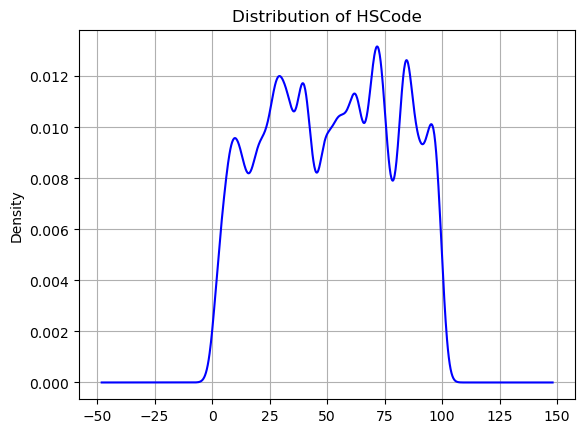

In [29]:
#Show the distribution of the single numerical column
df_num.HSCode.plot(kind = 'kde',color = 'blue') #Kernal Density Plot
plt.grid()
plt.title('Distribution of HSCode')
plt.show()

**Interpretation**
 - Minimum HSCode of the person in the data is 1.
 - Maximum HSCode of the person in the data is 99.
 - Average HSCode of the person in the data is 52.24.
 - The data follows multimodel distribution.

In [31]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

#### Value

In [33]:
# Show the minimum age
df_num.value.min()


0.0

In [34]:
#Show the maximum age
df_num.value.max()


32781.57

In [35]:
#Show the average
df_num.value.mean()


35.60708608635832

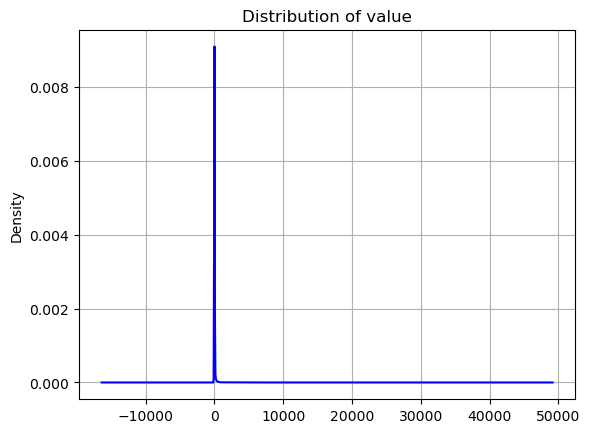

In [36]:
#Show the distribution of the single numerical column
df_num.value.plot(kind = 'kde',color = 'blue') #Kernal Density Plot
plt.grid()
plt.title('Distribution of value')
plt.show()

**Interpretation**
 - Minimum value in the data is 0.
 - Maximum value in the data is 32781.57.
 - Average value in the data is 35.607.

In [38]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

#### trade_value

In [40]:
# Show the minimum age
df_num.trade_value.min()


1000.47

In [41]:
# Show the minimum age
df_num.trade_value.max()

99999.21

In [42]:
# Show the minimum age
df_num.trade_value.mean()

50497.53675583002

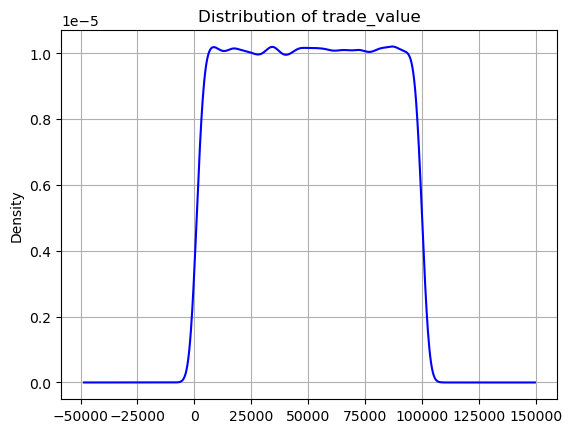

In [43]:
#Show the distribution of the single numerical column
df_num.trade_value.plot(kind = 'kde',color = 'blue') #Kernal Density Plot
plt.grid()
plt.title('Distribution of trade_value')
plt.show()

**Interpretation**
 - Minimum trade_value in the data is 1000.27.
 - Maximum trade_value in the data is 99999.21.
 - Average trade_value in the data is 50512.59271685737`.
 - The data follows multimodel distribution.

In [45]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

#### quantity

In [47]:
# Show the minimum age
df_num.quantity.min()


1

In [48]:
# Show the minimum age
df_num.quantity.max()

500

In [49]:
# Show the minimum age
df_num.quantity.mean()

250.6667893195962

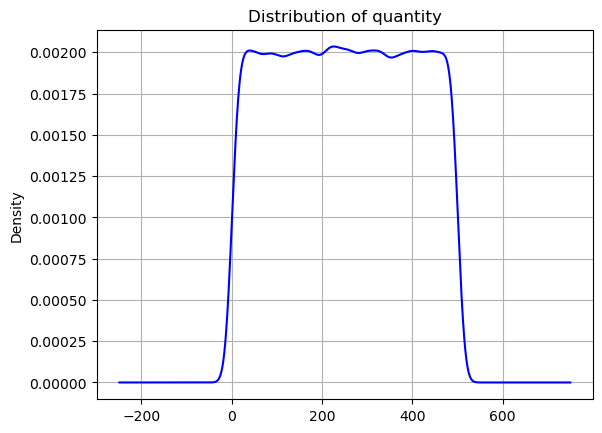

In [50]:
#Show the distribution of the single numerical column
df_num.quantity.plot(kind = 'kde',color = 'blue') #Kernal Density Plot
plt.grid()
plt.title('Distribution of quantity')
plt.show()

**Interpretation**
 - Minimum quantity in the data is 1.
 - Maximum quantity in the data is 500.
 - Average quantity in the data is 250.67602640431252.
 - The data follows multimodel distribution.

In [52]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

#### unit_price

In [54]:
# Show the minimum age
df_num.unit_price.min()

2.06

In [55]:
# Show the minimum age
df_num.unit_price.max()

99614.99

In [56]:
# Show the minimum age
df_num.unit_price.mean()

687.6116648802

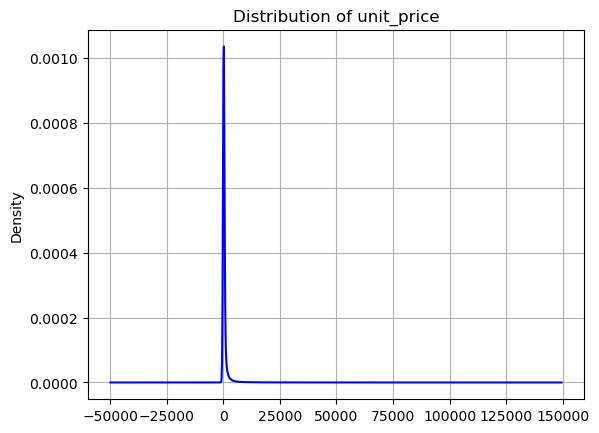

In [57]:
#Show the distribution of the single numerical column
df_num.unit_price.plot(kind = 'kde',color = 'blue') #Kernal Density Plot
plt.grid()
plt.title('Distribution of unit_price')
plt.show()

**Interpretation**

 - Minimum unit_price in the data is 2.
 - Maximum unit_price in the data is 99614.
 - Average unit_price in the data is 689.1248821236047.

In [59]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

#### shipping_cost

In [61]:
# Show the minimum age
df_num.shipping_cost.min()


100.01

In [62]:
# Show the minimum age
df_num.shipping_cost.max()

9999.98

In [63]:
# Show the minimum age
df_num.shipping_cost.mean()

5053.413814666091

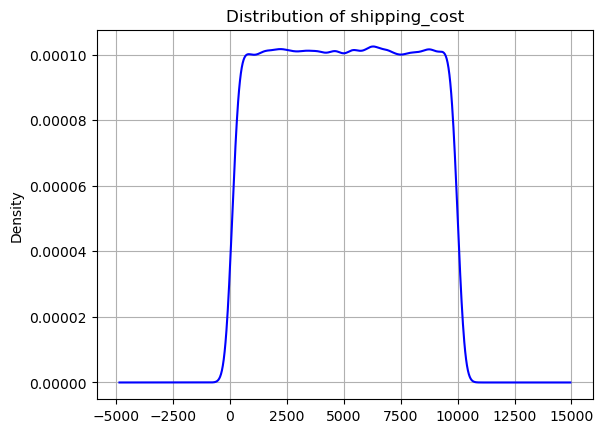

In [64]:
#Show the distribution of the single numerical column
df_num.shipping_cost.plot(kind = 'kde',color = 'blue') #Kernal Density Plot
plt.grid()
plt.title('Distribution of shipping_cost')
plt.show()

**Interpretation**

 - Minimum shipping_cost in the data is 100.01.
 - Maximum shipping_cost in the data is 9999.98.
 - Average shipping_cost in the data is 5053.132324639802.
 - The data follows multimodel distribution.

In [66]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

#### tax

In [68]:
# Show the minimum age
df_num.tax.min()


52.03

In [69]:
# Show the minimum age
df_num.tax.max()

14957.67

In [70]:
# Show the minimum age
df_num.tax.mean()

5047.068555308472

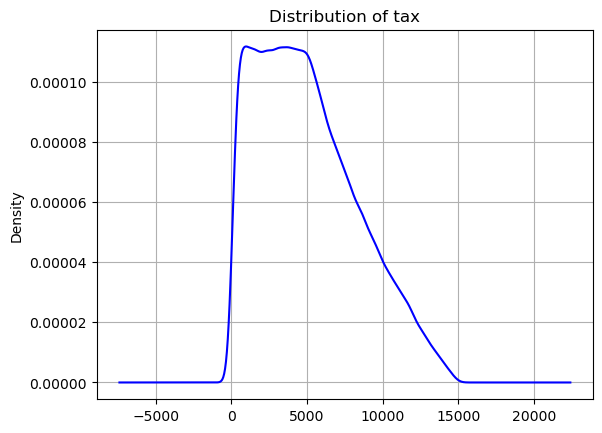

In [71]:
#Show the distribution of the single numerical column
df_num.tax.plot(kind = 'kde',color = 'blue') #Kernal Density Plot
plt.grid()
plt.title('Distribution of tax')
plt.show()

**Interpretation**

 - Minimum tax in the data is 52.03.
 - Maximum tax in the data is 14957.67.
 - Average tax in the data is 5050.602346549565.
 - The data follows multimodel distribution.

In [73]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

#### duty

In [75]:
# Show the minimum age
df_num.duty.min()

20.96

In [76]:
# Show the minimum age
df_num.duty.max()

9986.18

In [77]:
# Show the minimum age
df_num.duty.mean()

3031.500477546515

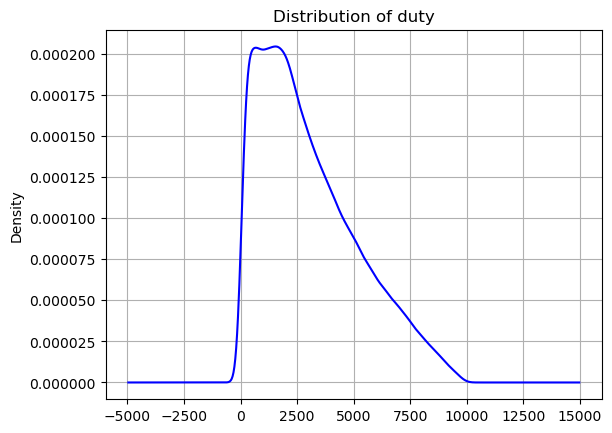

In [78]:
#Show the distribution of the single numerical column
df_num.duty.plot(kind = 'kde',color = 'blue') #Kernal Density Plot
plt.grid()
plt.title('Distribution of duty')
plt.show()

**Interpretation**

 - Minimum duty in the data is 20.96.
 - Maximum duty in the data is 9986.18.
 - Average duty in the data is 3033.3046796342433.
 - The data follows multimodel distribution.

### Categorical columns Analysis

In [81]:
df_cat.columns

Index(['type', 'Commodity', 'country'], dtype='object')

#### type

In [83]:
# Find the count
df_cat.type.value_counts()

type
Export    122985
Import     64536
Name: count, dtype: int64

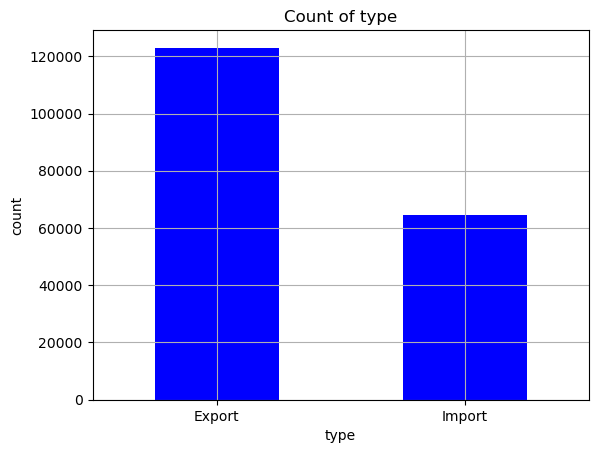

In [84]:
# Show the plot
df_cat.type.value_counts().plot(kind = 'bar',color = 'blue')
plt.grid()
plt.title('Count of type')
plt.xticks(rotation=0)
plt.ylabel('count')
plt.show()

**Interpretation**
 - We have count of supply exported is  137023.
 - We have count of supply imported is   76124.

In [86]:
df_cat.columns

Index(['type', 'Commodity', 'country'], dtype='object')

#### Commodity

In [88]:
# Find the count
df_cat.Commodity.value_counts()

Commodity
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.    3454
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.                                                                            3386
PLASTIC AND ARTICLES THEREOF.                                                                                                                             3104
OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;               3052
IRON AND STEEL                                                                                                                                            2960
                                                                                                                                                          ... 
MEAT AND EDIBLE MEAT OFFAL.         

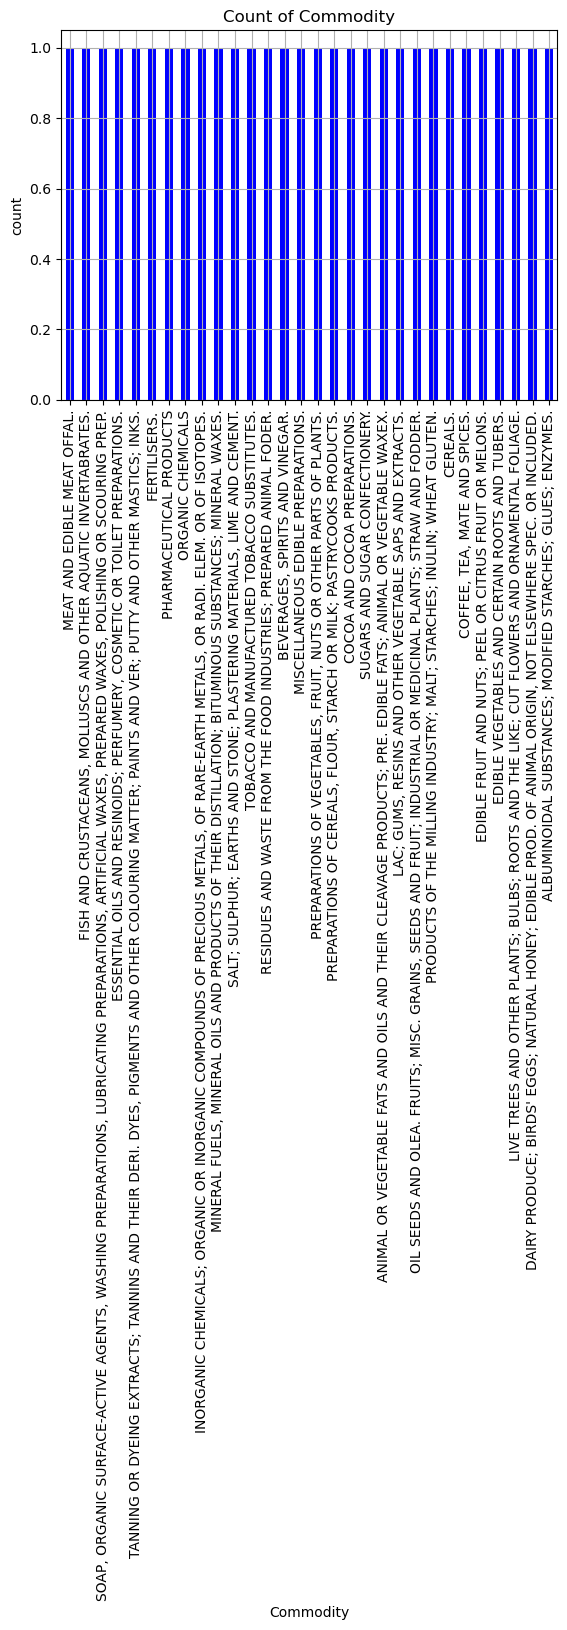

In [89]:
# Show the plot
df_cat.Commodity.head(30).value_counts().plot(kind = 'bar',color = 'blue')
plt.grid()
plt.title('Count of Commodity')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

**Interpretation**
 - We have the count of ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS is 3741.
 - We have the count of NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF is 3656
 - We have the count of PLASTIC AND ARTICLES THEREOF is 3397
 - We have the count of MISCELLANEOUS GOODS is 3389
 - We have the count of OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF is 3335
 - We have the count of TIN AND ARTICLES THEREOF is 969
 - We have the count of LIVE ANIMALS is 948
 - We have the count of MEAT AND EDIBLE MEAT OFFAL is 901
 - We have the count of FURSKINS AND ARTIFICIAL FUR, MANUFACTURES THEREOF is 900
 - We have the count of CORK AND ARTICLES OF CORK is 896


In [91]:
df_cat.columns

Index(['type', 'Commodity', 'country'], dtype='object')

#### country

In [93]:
# Find the count
df_cat.country.value_counts()


country
U S A                                       1750
AUSTRALIA                                   1748
BELGIUM                                     1745
GERMANY                                     1736
U K                                         1734
                                            ... 
CHANNEL IS                                     4
INSTALLATIONS IN INTERNATIONAL WATERS          3
JERSEY                                         2
SINT MAARTEN (DUTCH PART)                      2
CURACAO                                        2
Name: count, Length: 248, dtype: int64

In [193]:
# Show the plot
x = df_trade_data['country'].unique()
print(x)


['AFGHANISTAN TIS' 'ALBANIA' 'ALGERIA' 'AMERI SAMOA' 'ANDORRA' 'ANGOLA'
 'ANGUILLA' 'ANTARTICA' 'ANTIGUA' 'ARGENTINA' 'ARMENIA' 'ARUBA'
 'AUSTRALIA' 'AUSTRIA' 'AZERBAIJAN' 'BAHAMAS' 'BAHARAIN IS'
 'BANGLADESH PR' 'BARBADOS' 'BELARUS' 'BELGIUM' 'BELIZE' 'BENIN' 'BERMUDA'
 'BHUTAN' 'BOLIVIA' 'BOSNIA-HRZGOVIN' 'BOTSWANA' 'BR VIRGN IS' 'BRAZIL'
 'BRUNEI' 'BULGARIA' 'BURKINA FASO' 'BURUNDI' 'C AFRI REP' 'CAMBODIA'
 'CAMEROON' 'CANADA' 'CAPE VERDE IS' 'CAYMAN IS' 'CHAD' 'CHILE'
 'CHINA P RP' 'COLOMBIA' 'COMOROS' 'CONGO D. REP.' 'CONGO P REP' 'COOK IS'
 'COSTA RICA' "COTE D' IVOIRE" 'CROATIA' 'CUBA' 'CYPRUS' 'CZECH REPUBLIC'
 'DENMARK' 'DJIBOUTI' 'DOMINIC REP' 'DOMINICA' 'ECUADOR' 'EGYPT A RP'
 'EL SALVADOR' 'EQUTL GUINEA' 'ERITREA' 'ESTONIA' 'ETHIOPIA' 'FALKLAND IS'
 'FAROE IS.' 'FIJI IS' 'FINLAND' 'FR GUIANA' 'FR POLYNESIA' 'FRANCE'
 'GABON' 'GAMBIA' 'GEORGIA' 'GERMANY' 'GHANA' 'GIBRALTAR' 'GREECE'
 'GREENLAND' 'GRENADA' 'GUADELOUPE' 'GUAM' 'GUATEMALA' 'GUINEA'
 'GUINEA BISSAU' 'GUYANA' 'HA

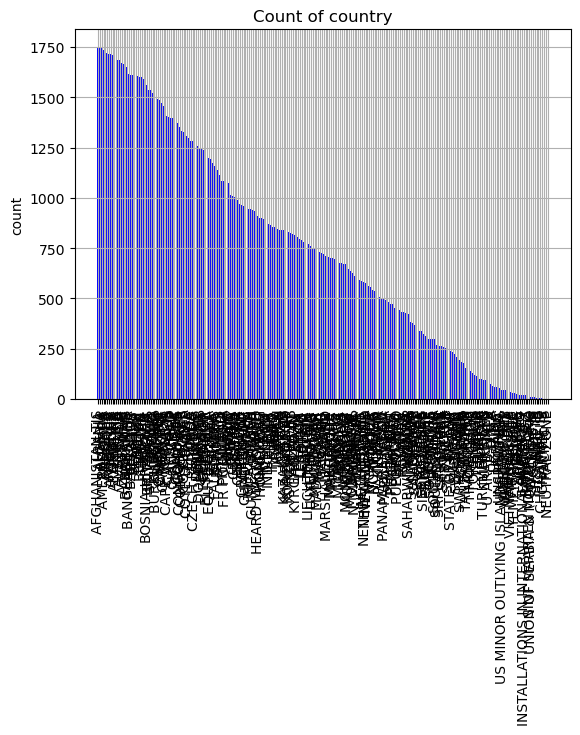

In [199]:
y=df_cat.country.value_counts()
plt.bar(x,y,color='blue')
plt.grid()
plt.title('Count of country')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [96]:
df_trade_data.columns

Index(['HSCode', 'type', 'Commodity', 'value', 'country', 'year',
       'trade_value', 'quantity', 'unit_price', 'shipping_cost', 'tax',
       'duty'],
      dtype='object')